In [21]:
import wrf_management.project_global_constants as gc
import wrf_management.utilities as ut
import os 
import pandas as pd 
import xarray as xr
import di_python.ya_esta as ye

In [22]:
path = os.path.join(gc.PATH_DATA,'runs/run_2019_02_20/2017_12_10/ungrib_lake/')
paths = mp,mps,mt = 'met_pre','met_pre_sur','met_tav'
pdic={}
for m in paths:
    pdic[m]={}
    pdic[m]['n']=m
    pdic[m]['p']=os.path.join(path,m)
df = pd.DataFrame(pdic).T
df

,n,p
met_pre,met_pre,/tmp/wrf_management/data_folder/runs/run_2019_...
met_pre_sur,met_pre_sur,/tmp/wrf_management/data_folder/runs/run_2019_...
met_tav,met_tav,/tmp/wrf_management/data_folder/runs/run_2019_...


In [23]:
for m in paths:
    fs = os.listdir(pdic[m]['p'])
    dff = pd.DataFrame(fs,columns=['file'])
    dff = dff[dff.file.str.startswith('met_em.d0')]
    dff =dff.sort_values('file')
    pdic[m]['f']=dff

In [24]:
m = mp
for m in paths:
    fp = os.path.join(pdic[m]['p'],pdic[m]['f'].iloc[0].file)
    xa=xr.open_dataset(fp)
    pdic[m]['vars']=list(xa.variables)

In [25]:
s1 = pdic[mt]['vars']
s2 = pdic[mps]['vars']
set(s1).difference(set(s2))

{'TAVGSFC'}

/tmp/wrf_management/data_folder/runs/run_2019_02_20/2017_12_10/ungrib_lake/
/tmp/wrf_management/data_folder/runs/run_2019_02_20/2017_12_10/ungrib_lake/met_em.d03.2017-12-10_06:00:00.nc


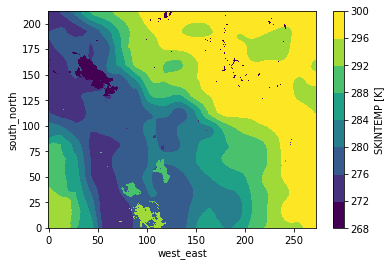

In [35]:
path = os.path.join(gc.PATH_DATA,'runs/run_2019_02_20/2017_12_10/ungrib_lake/')
print(path)

fs = os.listdir(path)
df = pd.DataFrame(fs,columns=['file'])
df = df[df.file.str.startswith('met_em.d03')]
df

file =df.iloc[0].file
file = os.path.join(path,file)
print(file)


vm,vM = 260,280
xa = xr.open_dataset(file)
xa.SKINTEMP.plot(levels=10, 
#                  vmin=vm,vmax=vM
                )

In [36]:
xa.NUM_METGRID_SOIL_LEVELS

4

<xarray.DataArray 'TAVGSFC' (Time: 1, south_north: 213, west_east: 273)>
array([[[290.0607 , 290.08923, ..., 298.963  , 298.9791 ],
        [290.08145, 290.1118 , ..., 298.96918, 298.98404],
        ...,
        [278.72968, 278.9731 , ..., 299.88162, 299.90024],
        [279.12714, 279.39642, ..., 299.8202 , 299.83884]]], dtype=float32)
Dimensions without coordinates: Time, south_north, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    units:        K
    description:  Temperature
    stagger:      M
    sr_x:         1
    sr_y:         1


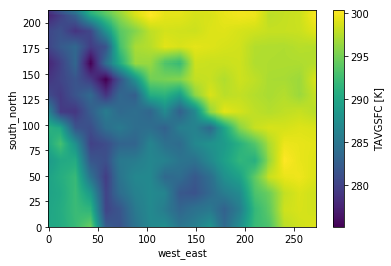

In [37]:
with xa['TAVGSFC'] as a :
    a.plot()
    print(a)


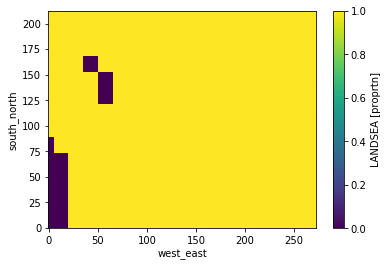

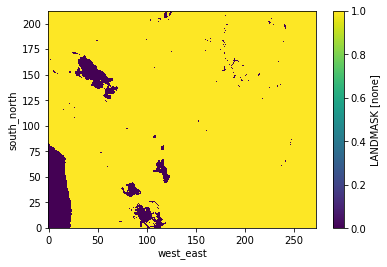

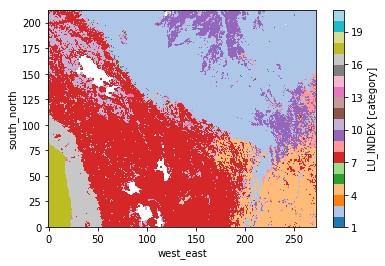

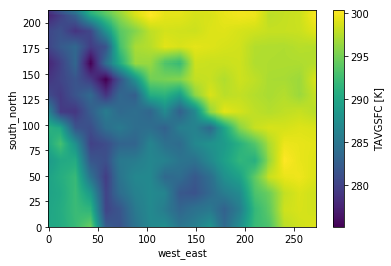

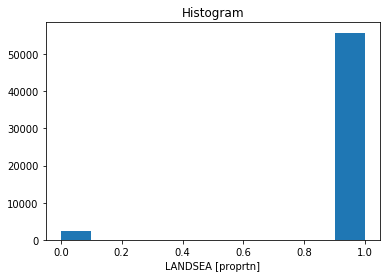

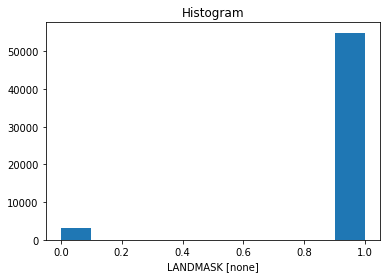

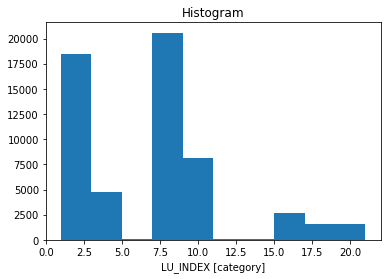

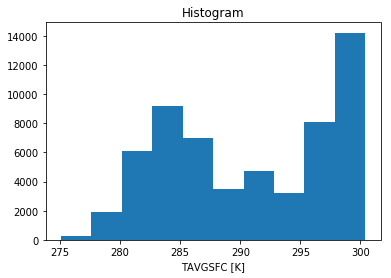

In [38]:
pls='LANDSEA','LANDMASK','LU_INDEX','TAVGSFC'
ops={},{},{'levels':21,'cmap':'tab20'},{}
for i in range(len(pls)):
    fig,ax = plt.subplots()
    xa[pls[i]].plot(**ops[i])
for i in range(len(pls)):
    fig,ax = plt.subplots()
    xa[pls[i]].plot.hist()

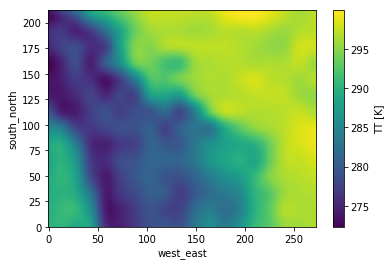

In [39]:
x1 = xa['TT'][0,0]
x1
x1.plot()

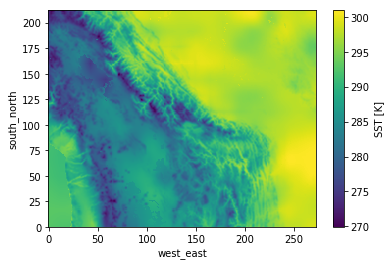

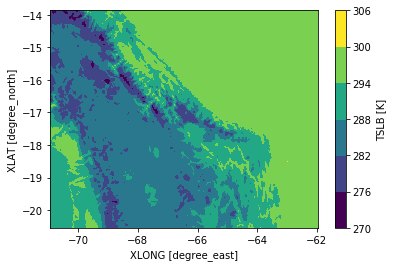

In [69]:
path = os.path.join(gc.PATH_DATA,'runs/run_2019_02_20/2017_12_10/ungrib_lake/')
fs = os.listdir(path)
dff = pd.DataFrame(fs,columns=['file'])
dff = dff[dff.file.str.startswith('wrfinput')]
dff =dff.sort_values('file')
f =dff.iloc[2].file
po = os.path.join
p = po(path,f)
xa = xr.open_dataset(p)
# ye.partition(list(xa.variables),5)
fig,ax = plt.subplots()
xa.SST.plot()
fig,ax = plt.subplots()
xa.TSLB[0,3].plot(x='XLONG',y='XLAT',levels=6)

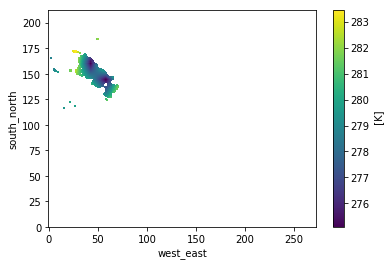

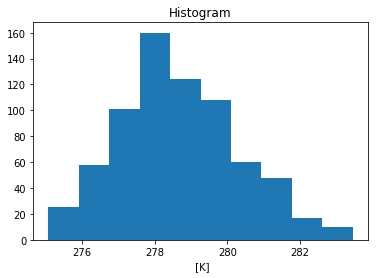

In [87]:
tslb = xa.TSLB[0,3].where(
    (xa.LAKEMASK==1) &
    (xa.XLAT>-17) & 
    (xa.XLONG<-68)  
        
    
)
fig,ax=plt.subplots()
tslb.plot()
fig,ax=plt.subplots()
tslb.plot.hist();

In [51]:
ye.partition(list(xa.variables),5)

[array(['Times', 'XLAT', 'XLONG', 'LU_INDEX', 'ZNU', 'ZNW', 'ZS', 'DZS',
        'VAR_SSO', 'EROD', 'U', 'V', 'W', 'PH', 'PHB', 'T', 'THM',
        'T_INIT', 'MU', 'MUB', 'P', 'PB', 'FNM', 'FNP', 'RDNW', 'RDN',
        'DNW', 'DN', 'T_BASE', 'CFN', 'CFN1', 'STEP_NUMBER',
        'THIS_IS_AN_IDEAL_RUN', 'P_HYD', 'Q2', 'T2', 'TH2'], dtype='<U20'),
 array(['PSFC', 'U10', 'V10', 'RDX', 'RDY', 'DTS', 'DTSEPS', 'RESM',
        'ZETATOP', 'CF1', 'CF2', 'CF3', 'QVAPOR', 'QCLOUD', 'QRAIN',
        'QICE', 'QSNOW', 'QGRAUP', 'FCX', 'GCX', 'TOPOSLPX', 'TOPOSLPY',
        'SHDMAX', 'SHDMIN', 'SNOALB', 'LANDUSEF', 'SOILCTOP', 'SOILCBOT',
        'TSLB', 'SMOIS', 'SH2O', 'SMCREL', 'SEAICE', 'IVGTYP', 'ISLTYP',
        'VEGFRA', 'SNOW'], dtype='<U20'),
 array(['SNOWH', 'CANWAT', 'FNDSNOWH', 'FNDSOILW', 'FNDALBSI', 'FNDSNOWSI',
        'FNDICEDEPTH', 'LAKE_DEPTH', 'UOCE', 'VOCE', 'FRC_URB2D', 'LAI',
        'VAR', 'CON', 'OA1', 'OA2', 'OA3', 'OA4', 'OL1', 'OL2', 'OL3',
        'OL4', 'MAPFAC_M', 'MAPF

In [89]:
path = os.path.join(gc.PATH_DATA,'runs/run_2019_02_20/2017_12_10/ungrib_lake/')
fs = os.listdir(path)
dff = pd.DataFrame(fs,columns=['file'])
dff = dff[dff.file.str.startswith('wrfbdy')]
dff =dff.sort_values('file')
f =dff.iloc[0].file
po = os.path.join
p = po(path,f)
xa = xr.open_dataset(p)
# ye.partition(list(xa.variables),5)

In [94]:
xa.T_BTXE

<xarray.DataArray 'T_BTXE' (Time: 3, bdy_width: 5, bottom_top: 49, south_north: 85)>
array([[[[ 0.645664, ..., -1.2018  ],
         ...,
         [ 1.401944, ..., -0.525046]],

        ...,

        [[ 0.989714, ..., -1.620043],
         ...,
         [ 3.358241, ..., -2.817454]]],


       ...,


       [[[-2.494635, ...,  1.194514],
         ...,
         [-0.012593, ...,  2.748704]],

        ...,

        [[ 8.221756, ...,  1.39511 ],
         ...,
         [ 0.920556, ..., 12.144814]]]], dtype=float32)
Dimensions without coordinates: Time, bdy_width, bottom_top, south_north
Attributes:
    FieldType:    104
    MemoryOrder:  XEZ
    description:  bdy tend either 1) pert moist pot temp=(1+Rv/Rd Qv)*(theta)...
    units:        (K)/dt
    stagger:      